### For a full list of all the possible Pandas operations:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

#### Pandas (and, to be fair, any library or package, really) is nebulous. It's impossible to teach all of it in a single semester, yet alone a single class. Thus, think of today as learning the art of the possible – of knowing how Pandas thinks – and the rest of your career as learning how to speak its language. 

---------------

### Step 1: Let's Explore our Data

#### In order to upload our CSV to Jupyter Notebook, we need to point our machine into the right folder, so to speak. We can use Command Line commands (here's a good cheat sheet: https://fosswire.com/post/2007/08/unixlinux-command-cheat-sheet/)

#### Think of this like using your mouse to click into and out of folders on your desktop. This is just bypassing UI.

In [1]:
import pandas as pd

pd.options.display.max_rows = 5000 # this just let's us change the Jupyter display to see more values. 
pd.options.display.max_columns = 100 # again, we're just allowing ourselves to see more values re: columns. 

#### For more on options and settings check out https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

### *Did you get a 'ImportError: No Module named Pandas' error? Not a problem! Just go into your terminal and type the following:

1.  curl https://bootstrap.pypa.io/get-pip.py -o get-pip.py 
2.  python get-pip.py 
3.  sudo pip install pandas 

In [2]:
pwd # print working directory 

'C:\\Users\\colling\\!dwd_spring2019\\classes\\class9'

In [3]:
data = pd.read_csv('propensity_data.csv') # we are reading in our csv and assinging it the value 'data'. 
                                          # you can, of course, name this whatever you'd like!

# fun fact, you can use the 'Tab' button to auto-complete a file name!

In [4]:
data.head() # '.head()' will give you the first 5 rows. '.tail()' will give you the last 5 rows

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted
0,35,Open,2018-09-06 02:02:59 UTC,0,Funds,1,1,0,0,1,1,0
1,50,Locked,2018-09-06 02:04:00 UTC,0,Funds,1,1,0,0,0,0,0
2,51,Locked,2018-09-06 02:04:01 UTC,0,Funds,1,2,1,0,1,1,0
3,69,Open,2018-09-06 02:05:40 UTC,0,Funds,1,1,0,0,0,1,0
4,74,Open,2018-09-06 02:05:59 UTC,0,Funds,1,1,0,0,0,1,0


In [5]:
list(data) # let's get a list of all the column names in our file

['pageID',
 'paywall',
 'time',
 'daysSinceFirstSeen',
 'section',
 'visitNum',
 'pageNum',
 'registered',
 'edu',
 'mobile',
 'mac',
 'converted']

--------

### Some definitions for us: 

*pageID*: A random ID assigned to the instance.

*paywall:* What paywall experience the visitor got.

*time:* What time the content was accessed.

*daysSinceFirstSeen:*
Days since we first saw the visitor.

*section:* On what section of the site did the article view occur? 

*visitNum:* Visit number.

*pageNum:* Page number within the visit.

*registered:* Whether or not the user is registered.

*edu:* Whether or not the user is visiting from a '.edu' domain.

*mobile:* Whether or not the user is on a mobile phone.

*mac:* Whether or not the user is using an Apple device.

*converted:* A binary value, '0' for did not convert, '1' for did convert.

-----------

In [6]:
data.info() # some basic info on our dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590381 entries, 0 to 590380
Data columns (total 12 columns):
pageID                590381 non-null int64
paywall               590381 non-null object
time                  590381 non-null object
daysSinceFirstSeen    590381 non-null int64
section               590381 non-null object
visitNum              590381 non-null int64
pageNum               590381 non-null int64
registered            590381 non-null int64
edu                   590381 non-null int64
mobile                590381 non-null int64
mac                   590381 non-null int64
converted             590381 non-null int64
dtypes: int64(9), object(3)
memory usage: 54.1+ MB


In [7]:
data.count() # this is telling us the number of values we have per column

pageID                590381
paywall               590381
time                  590381
daysSinceFirstSeen    590381
section               590381
visitNum              590381
pageNum               590381
registered            590381
edu                   590381
mobile                590381
mac                   590381
converted             590381
dtype: int64

In [8]:
data.sample() # a random sample row from our data frame

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted
341293,176904,Open,2018-09-13 17:20:04 UTC,0,Personal Finance,1,1,0,0,1,0,0


In [9]:
data.iloc[3] # .iloc is how we index through a data frame. In this case, we're asking for the first row
             # remember, too, Python is 0-index, so the 3rd value is actually the fourth row!

pageID                                     69
paywall                                  Open
time                  2018-09-06 02:05:40 UTC
daysSinceFirstSeen                          0
section                                 Funds
visitNum                                    1
pageNum                                     1
registered                                  0
edu                                         0
mobile                                      0
mac                                         1
converted                                   0
Name: 3, dtype: object

In [10]:
data.iloc[3,2] # [row, column] aka, the fourth row, third column (time)

'2018-09-06 02:05:40 UTC'

In [11]:
data.sample(random_state=1) # random_state ensures that we all get the same values :) 

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted
536022,287824,Locked,2018-09-19 09:10:47 UTC,194,Personal Finance,3,1,0,0,0,0,0


### ^ We can see that our user, #536022, was last seen 194 days ago when he/she visited the Personal Finance section three times , and he/she did not convert. 

----------

### Step 2: Exploratory Analysis

#### What is the average conversion rate for our sample users? 

In [12]:
avg_conversion = data['converted'].mean()

avg_conversion

0.0011873688347016588

In [13]:
# below we are just reformatting our value for ease of reading

percentage = '{0:.2f}'.format(avg_conversion) 
print(percentage + " = to two decimals places.")

percentage = '{0:.4f}'.format(avg_conversion)
print(percentage + " = to four decimal places.")

percentage = '{0:.6f}'.format(avg_conversion)
print(percentage + " = to six decimal places.")

0.00 = to two decimals places.
0.0012 = to four decimal places.
0.001187 = to six decimal places.


#### What about the difference in conversion rate between locked and open paywall users? 

In [14]:
conversion_by_paywall = data.groupby('paywall').mean()
conversion_by_paywall['converted']

paywall
Locked    0.001882
Open      0.000604
Name: converted, dtype: float64

#### What about the difference in conversion rate as it relates to visit numbers? 


In [15]:
conversion_by_paywall = data.groupby('visitNum').mean()
conversion_by_paywall['converted'].sort_values(ascending=False)

visitNum
1345    0.333333
642     0.090909
678     0.083333
555     0.071429
270     0.023256
235     0.015625
244     0.014706
165     0.010204
208     0.010101
161     0.009804
174     0.008197
131     0.007143
143     0.006849
60      0.006757
128     0.006667
81      0.006231
118     0.005780
59      0.005329
103     0.004348
37      0.004172
91      0.003788
92      0.003690
83      0.003356
34      0.003155
80      0.002890
76      0.002551
52      0.002545
50      0.002421
16      0.002098
4       0.002034
64      0.001972
43      0.001951
3       0.001834
24      0.001817
12      0.001754
58      0.001669
11      0.001652
38      0.001575
7       0.001553
14      0.001548
9       0.001546
17      0.001480
8       0.001444
36      0.001401
5       0.001383
6       0.001346
51      0.001312
49      0.001304
35      0.001302
13      0.001271
10      0.001253
19      0.001242
15      0.001240
2       0.001239
26      0.001179
32      0.001149
48      0.001135
25      0.001107
46   

In [16]:
data.loc[data['visitNum']==1345]

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted
484212,589670,Locked,2018-10-01 01:21:54 UTC,591,Personal Finance,1345,1,0,0,1,1,0
526782,249878,Locked,2018-09-17 12:07:04 UTC,425,Personal Finance,1345,5,1,0,0,0,1
530163,454998,Locked,2018-09-26 09:47:25 UTC,434,Personal Finance,1345,7,0,0,1,1,0


In [17]:
data.loc[data['visitNum']==642]

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted
87559,14497,Locked,2018-09-06 15:45:50 UTC,307,Funds,642,5,1,0,0,1,0
90685,152214,Locked,2018-09-12 17:19:10 UTC,568,Funds,642,2,1,0,0,0,0
90686,152240,Locked,2018-09-12 17:20:13 UTC,568,Funds,642,3,1,0,0,0,0
129999,477780,Locked,2018-09-26 22:01:45 UTC,426,Funds,642,3,0,0,0,0,0
130000,478358,Locked,2018-09-26 22:24:48 UTC,426,Funds,642,15,0,0,0,0,0
130297,196843,Locked,2018-09-14 13:30:45 UTC,172,Funds,642,3,0,0,0,0,0
299518,250644,Locked,2018-09-17 12:18:57 UTC,425,Stock Tips,642,7,1,0,0,0,0
303965,37933,Locked,2018-09-07 14:55:36 UTC,184,Stock Tips,642,15,0,0,0,0,0
306453,511124,Locked,2018-09-28 12:11:07 UTC,191,Stock Tips,642,4,1,0,0,1,1
442572,572093,Locked,2018-09-30 11:02:40 UTC,290,Personal Finance,642,9,1,0,0,1,0


#### What about the difference in conversion rate as it relates to section? 

In [18]:
conversion_by_paywall = data.groupby('section').mean()
conversion_by_paywall['converted']

section
Funds                  0.001279
Personal Finance       0.000828
Retirement Planning    0.001550
Stock Tips             0.001525
Name: converted, dtype: float64

### How about some graphical insights?

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

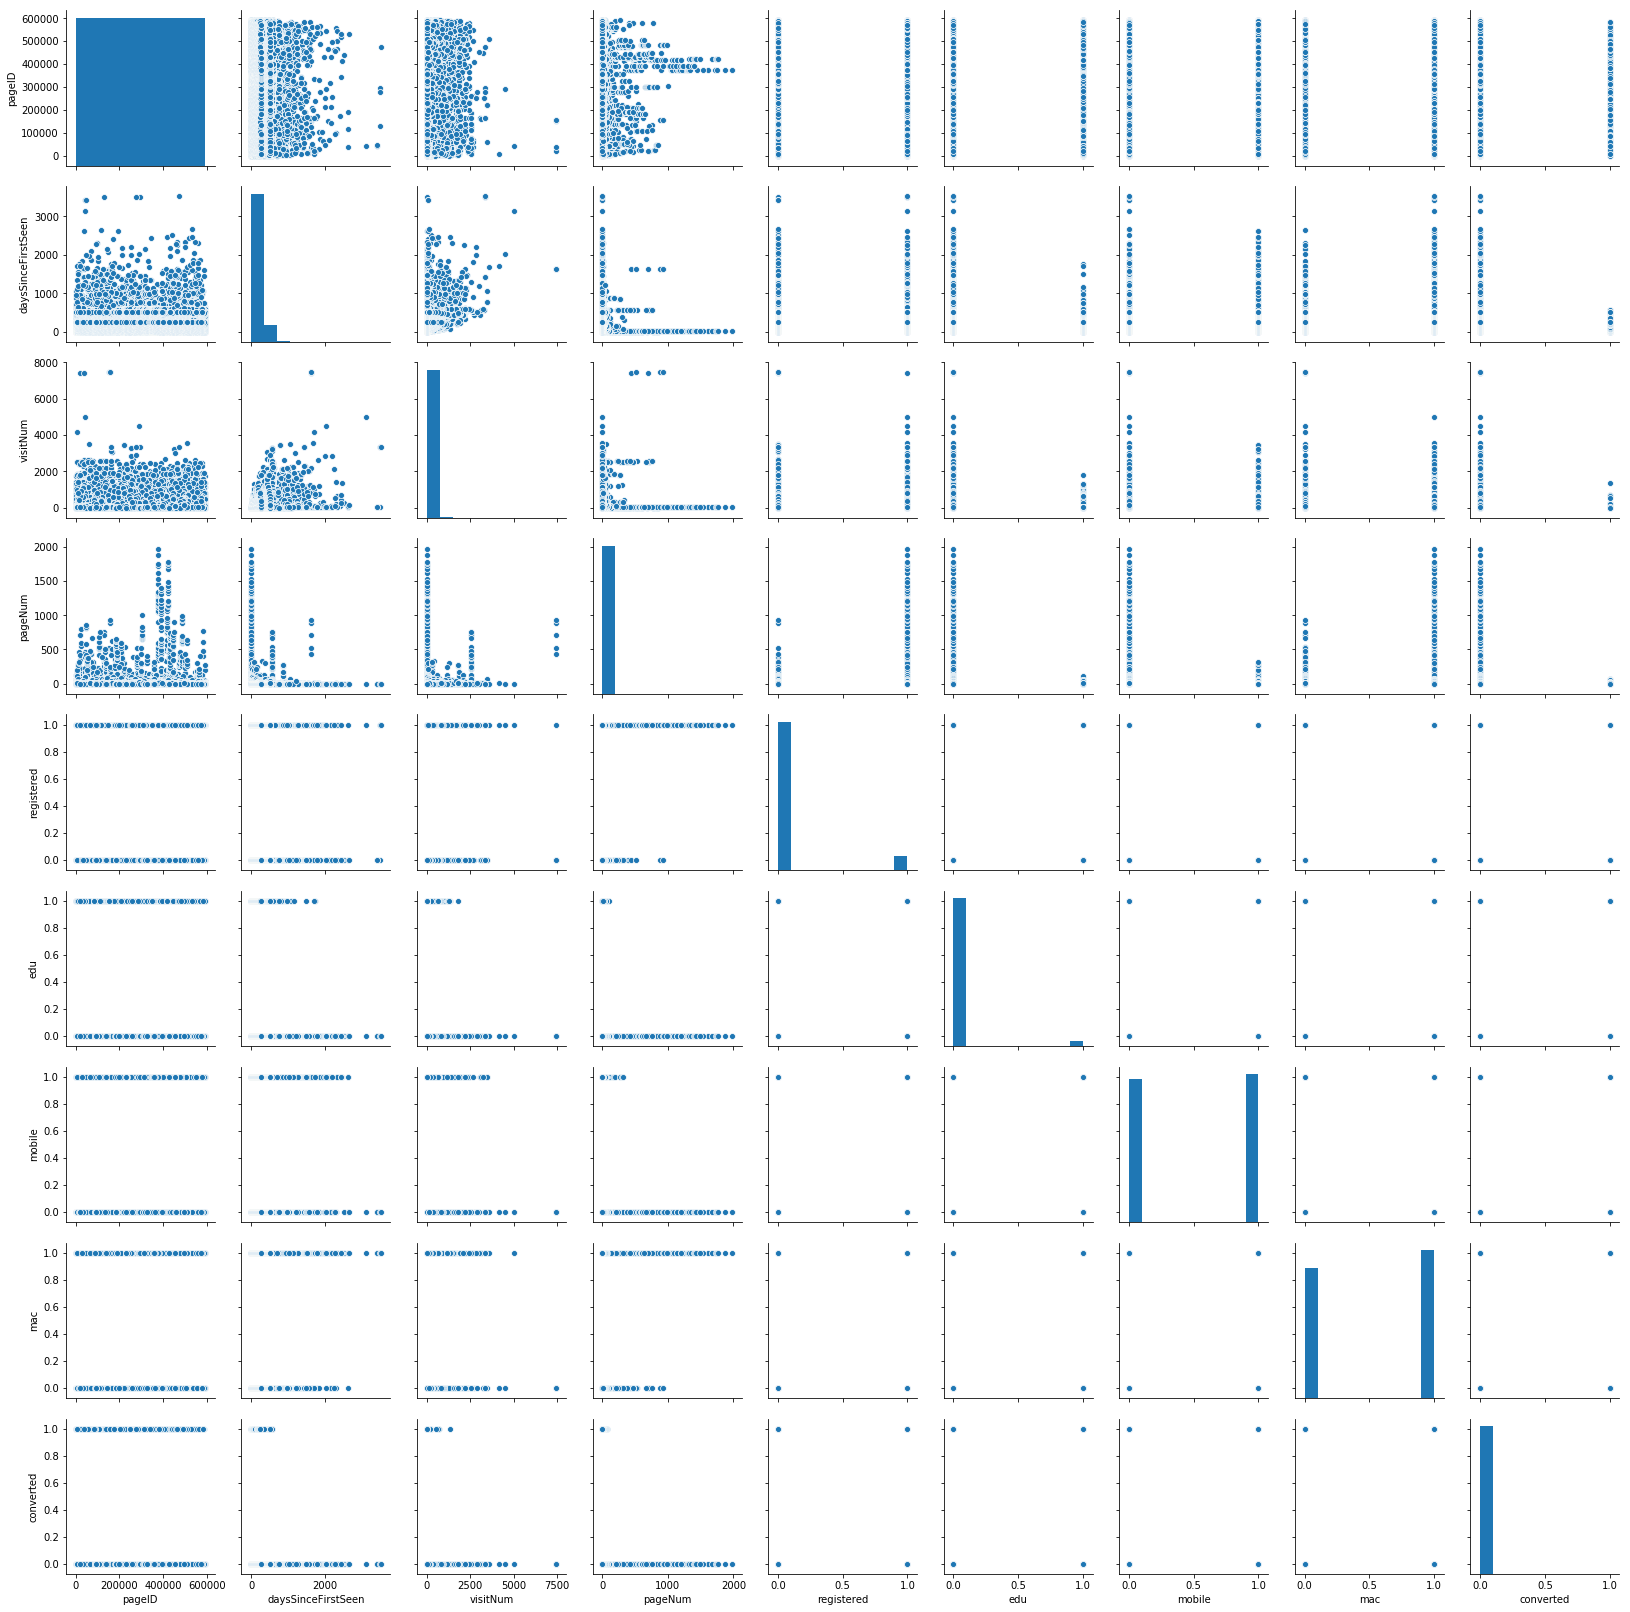

In [20]:
sns.pairplot(data.dropna())

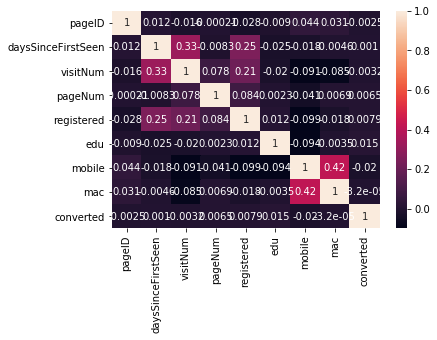

In [21]:
sns.heatmap(data.corr(),annot=True)

-----------

### Step 3: Feature Engineering

### In order to use Linear Regression, we can't have text values, but, right now 'paywall' and 'section' are all text. A computer doesn't know what Open versus Locked means, nor does it know what Funds versus Personal Finance means. So, we create dummy variables!

In [22]:
dummy = pd.get_dummies(data['section'])
dummy.head()

,Funds,Personal Finance,Retirement Planning,Stock Tips
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [23]:
data = pd.concat([data,dummy],axis=1) # axis=1 means we are adding by column, not the row
data.head()

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted,Funds,Personal Finance,Retirement Planning,Stock Tips
0,35,Open,2018-09-06 02:02:59 UTC,0,Funds,1,1,0,0,1,1,0,1,0,0,0
1,50,Locked,2018-09-06 02:04:00 UTC,0,Funds,1,1,0,0,0,0,0,1,0,0,0
2,51,Locked,2018-09-06 02:04:01 UTC,0,Funds,1,2,1,0,1,1,0,1,0,0,0
3,69,Open,2018-09-06 02:05:40 UTC,0,Funds,1,1,0,0,0,1,0,1,0,0,0
4,74,Open,2018-09-06 02:05:59 UTC,0,Funds,1,1,0,0,0,1,0,1,0,0,0


In [24]:
dummy2 = pd.get_dummies(data['paywall'])
data = pd.concat([data,dummy2],axis=1)

data.head()

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted,Funds,Personal Finance,Retirement Planning,Stock Tips,Locked,Open
0,35,Open,2018-09-06 02:02:59 UTC,0,Funds,1,1,0,0,1,1,0,1,0,0,0,0,1
1,50,Locked,2018-09-06 02:04:00 UTC,0,Funds,1,1,0,0,0,0,0,1,0,0,0,1,0
2,51,Locked,2018-09-06 02:04:01 UTC,0,Funds,1,2,1,0,1,1,0,1,0,0,0,1,0
3,69,Open,2018-09-06 02:05:40 UTC,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1
4,74,Open,2018-09-06 02:05:59 UTC,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1


#### Lastly, using a raw number for the hour of the day visited is fine, but it would be more helpful if we can capture cyclical effects. For instance, 11pm and 1 am are more similar than 11pm and 5 pm – using the raw number wouldn't capture that relationship. 

In [25]:
from datetime import datetime

data['time'] = pd.to_datetime(data['time'],errors='coerce')

#### Working with datetime is notoriously frustrating. 

#### For documentation check out https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

In [26]:
data['weekday'] = data['time'].dt.weekday # Monday = 0, Sunday = 6
data['weekday'] = (data['weekday'] < 5).astype(int) 

data['morning'] = data['time'].dt.hour # 0 - 23
data['morning'] = (data['morning'] < 12).astype(int)

data.head()

,pageID,paywall,time,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted,Funds,Personal Finance,Retirement Planning,Stock Tips,Locked,Open,weekday,morning
0,35,Open,2018-09-06 02:02:59,0,Funds,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1
1,50,Locked,2018-09-06 02:04:00,0,Funds,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1
2,51,Locked,2018-09-06 02:04:01,0,Funds,1,2,1,0,1,1,0,1,0,0,0,1,0,1,1
3,69,Open,2018-09-06 02:05:40,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1
4,74,Open,2018-09-06 02:05:59,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1


------

### Step 4: Modeling

#### First, let's remind ourselves of the columns we have after implementing our dummy variables. 

In [27]:
## Here are two ways to select numeric data and keep columns

numeric_data = data.select_dtypes(exclude=['object', 'datetime64'])
X1 = numeric_data.loc[:, ~numeric_data.columns.isin(['converted', 'pageID'])]

### OR more pythonically

keep_columns = [x for x in numeric_data.columns if x not in ['converted','pageID']]
X2 = numeric_data.loc[:, keep_columns]
X2.head()

,daysSinceFirstSeen,visitNum,pageNum,registered,edu,mobile,mac,Funds,Personal Finance,Retirement Planning,Stock Tips,Locked,Open,weekday,morning
0,0,1,1,0,0,1,1,1,0,0,0,0,1,1,1
1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1
2,0,1,2,1,0,1,1,1,0,0,0,1,0,1,1
3,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1
4,0,1,1,0,0,0,1,1,0,0,0,0,1,1,1


In [28]:
data.drop(['time'],axis=1,inplace=True) # inplace = True means it's a permanent change

In [29]:
data.head()

,pageID,paywall,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted,Funds,Personal Finance,Retirement Planning,Stock Tips,Locked,Open,weekday,morning
0,35,Open,0,Funds,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1
1,50,Locked,0,Funds,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1
2,51,Locked,0,Funds,1,2,1,0,1,1,0,1,0,0,0,1,0,1,1
3,69,Open,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1
4,74,Open,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1


In [30]:
X = data[['daysSinceFirstSeen','visitNum','pageNum','registered','edu','mobile','mac','Funds','Personal Finance','Retirement Planning','Stock Tips','Locked','Open','weekday','morning']] 
y = data['converted']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 101)

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
regr = LinearRegression()

In [33]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [34]:
y_pred = regr.predict(X_test)

In [35]:
print(y_pred)

[ 1.73372149e-03  1.34430431e-03  1.09479045e-03 ...  2.24113835e-03
  1.56950294e-03 -2.53191116e-05]


In [36]:
data2 = pd.DataFrame(y_pred).rename(columns=lambda x: 'PredictedValue')
data2

,PredictedValue
0,1.733721e-03
1,1.344304e-03
2,1.094790e-03
3,7.617985e-04
4,2.219842e-03
5,-5.714095e-04
6,1.552416e-03
7,-1.188244e-03
8,2.527558e-03
9,2.137868e-03


In [37]:
X_test['predictions'] = y_pred

C:\Users\colling\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
dataAll = pd.concat([data,data2],axis=1)
dataAll.head()

,pageID,paywall,daysSinceFirstSeen,section,visitNum,pageNum,registered,edu,mobile,mac,converted,Funds,Personal Finance,Retirement Planning,Stock Tips,Locked,Open,weekday,morning,PredictedValue
0,35,Open,0,Funds,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0.001734
1,50,Locked,0,Funds,1,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0.001344
2,51,Locked,0,Funds,1,2,1,0,1,1,0,1,0,0,0,1,0,1,1,0.001095
3,69,Open,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0.000762
4,74,Open,0,Funds,1,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0.002220


In [39]:
coeff_df = pd.DataFrame(regr.coef_,X.columns,columns=['Coefficient'])

coeff_df

,Coefficient
daysSinceFirstSeen,4.755208e-07
visitNum,-2.807972e-06
pageNum,1.132707e-05
registered,3.981391e-04
edu,2.757173e-03
mobile,-1.506226e-03
mac,5.565518e-04
Funds,-2.156508e-05
Personal Finance,-3.841477e-04
Retirement Planning,2.928187e-04


In [40]:
from sklearn import metrics
import matplotlib.pyplot as plt

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.002465059028693584
MSE: 0.0011746764077016731
RMSE: 0.03427355259820133


### RMSE (Root Mean Squared Error) is the Standard Deviation of the residuals (prediction error). The residuals are thus a measure of how far from the regression line the data points are. 

### If there is a perfect correlation (correlation coefficient = 1), the RMSE will be 0, because all the points will lie on the regression line, thus, there are no errors. 

### So, we didn't do too bad with an RMSE of approximately .034!

-------

### But, let's try a logistic regression, which is more appropriate given that we're trying to do a binary classification (convert versus not convert).

In [41]:
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics

logreg = LogisticRegression(solver='lbfgs')

X = data[['pageID','daysSinceFirstSeen','visitNum','pageNum','registered','edu','mobile','mac','Funds','Personal Finance','Retirement Planning','Stock Tips','Locked','Open','weekday','morning']] 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .4, random_state = 101)

In [42]:
#print("X_train_info" + str(X_train.describe()))
#print("X_test_info" + str(X_test.describe()))
#print("y_train_info" + str(y_train.describe()))
#print("y_test_info" + str(y_test.describe(())))

In [43]:
logreg.fit(X_train, y_train, sample_weight=None)

y_pred = logreg.predict(X_test)

In [44]:
score = logreg.score(X_test,y_test)
print(score)

0.9988227970849407


In [45]:
cm = metrics.confusion_matrix(y_test, y_test)
print(cm)

[[235875      0]
 [     0    278]]


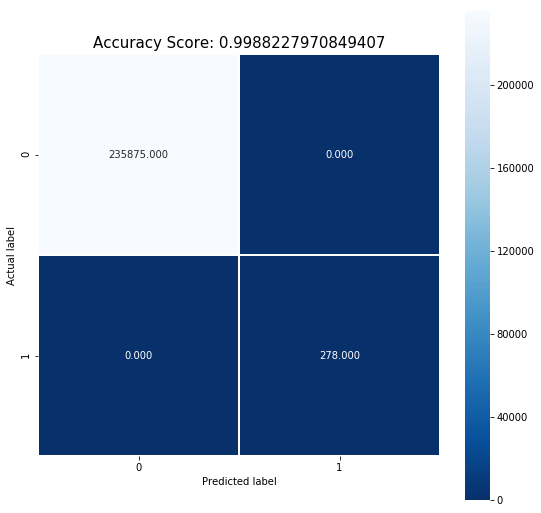

In [46]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Does this seem too good to be true? Because it is! Basically, because the average conversion rate is so low, the model just 'assumed' the default 'not converted' for most samples, which would be correct 99.8% of the time. 

-----

In [47]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 99.8776%
Log Loss: 0.03980702257956502
DecisionTreeClassifier
****Results****
Accuracy: 99.7552%
Log Loss: 0.08453592694676168


C:\Users\colling\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier
****Results****
Accuracy: 99.8814%
Log Loss: 0.03655343276228659
AdaBoostClassifier
****Results****
Accuracy: 99.8819%
Log Loss: 0.6130726728878815
GradientBoostingClassifier
****Results****
Accuracy: 99.8717%
Log Loss: 0.010418128020195446
GaussianNB
****Results****
Accuracy: 99.8823%
Log Loss: 0.010356154874663692


C:\Users\colling\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis
****Results****
Accuracy: 99.8636%
Log Loss: 0.009507091390119226


C:\Users\colling\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\colling\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:692: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis
****Results****
Accuracy: 94.6632%
Log Loss: 0.3664473416256455
